# This script contains the following:

1. Importing libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Federal Reserve Economic Data

# 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# Define path

path = r'C:\Users\irikh\iCloudDrive\Data analytics\COURSE DATA ANALYTIC\COURSE DATA IMMERG\A6'

In [5]:
# Import data

citi = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'c_wrangled4.csv'), index_col = False)

In [7]:
citi.shape

(42990, 20)

# 2. Subsetting, wrangling, and cleaning time-series data

In [8]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42990 entries, 0 to 42989
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               42990 non-null  int64  
 1   bike_id                  42990 non-null  int64  
 2   day_of_week              42990 non-null  object 
 3   start_hour               42990 non-null  int64  
 4   ride_start               42990 non-null  object 
 5   ride_start_date          42990 non-null  object 
 6   ride_start_time          42990 non-null  object 
 7   start_station_id         42990 non-null  int64  
 8   start_station_name       42990 non-null  object 
 9   start_station_latitude   42990 non-null  float64
 10  start_station_longitude  42990 non-null  float64
 11  ride_end                 42990 non-null  object 
 12  end_station_id           42990 non-null  int64  
 13  end_station_name         42990 non-null  object 
 14  end_station_latitude  

In [9]:
# Changing data type to datetime 
citi['ride_start_date'] = pd.to_datetime(citi['ride_start_date'])

In [10]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42990 entries, 0 to 42989
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               42990 non-null  int64         
 1   bike_id                  42990 non-null  int64         
 2   day_of_week              42990 non-null  object        
 3   start_hour               42990 non-null  int64         
 4   ride_start               42990 non-null  object        
 5   ride_start_date          42990 non-null  datetime64[ns]
 6   ride_start_time          42990 non-null  object        
 7   start_station_id         42990 non-null  int64         
 8   start_station_name       42990 non-null  object        
 9   start_station_latitude   42990 non-null  float64       
 10  start_station_longitude  42990 non-null  float64       
 11  ride_end                 42990 non-null  object        
 12  end_station_id           42990 n

In [11]:
#Ride counts by day subset 
day_counts = citi.groupby( citi['ride_start_date'].dt.date)['ride_start_date'].count()

In [21]:
day_counts

ride_start_date
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1238
2013-09-16    1344
2013-09-17    1658
2013-09-18    1680
2013-09-19    1634
2013-09-20    1777
2013-09-21    1227
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
Name: ride_start_date, dtype: int64

In [25]:
result = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values})

In [27]:
result.head

<bound method NDFrame.head of           date  ride_count
0   2013-09-01         778
1   2013-09-02         743
2   2013-09-03        1397
3   2013-09-04        1543
4   2013-09-05        1435
5   2013-09-06        1522
6   2013-09-07        1205
7   2013-09-08        1206
8   2013-09-09        1487
9   2013-09-10        1646
10  2013-09-11        1587
11  2013-09-12        1401
12  2013-09-13        1701
13  2013-09-14        1203
14  2013-09-15        1238
15  2013-09-16        1344
16  2013-09-17        1658
17  2013-09-18        1680
18  2013-09-19        1634
19  2013-09-20        1777
20  2013-09-21        1227
21  2013-09-22        1121
22  2013-09-23        1557
23  2013-09-24        1728
24  2013-09-25        1679
25  2013-09-26        1742
26  2013-09-27        1594
27  2013-09-28        1329
28  2013-09-29        1162
29  2013-09-30        1666>

In [36]:
# Check for missing values 

day_counts.isnull().sum() 

0

In [40]:
# Check for duplicates

dups = result.duplicated()
dups.sum()

# No dups!

0

In [29]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,ride_count
datetime,
2013-09-01,778
2013-09-02,743
2013-09-03,1397
2013-09-04,1543
2013-09-05,1435


# I selected this subset because this is one month time data set of citi bike which can show rends of how many rides will occur next month.  

In [30]:
# Reset index so that you can use the "Date" column as a filter

result_2 = result.reset_index()

In [31]:
result_2

,datetime,ride_count
0,2013-09-01,778
1,2013-09-02,743
2,2013-09-03,1397
3,2013-09-04,1543
4,2013-09-05,1435
5,2013-09-06,1522
6,2013-09-07,1205
7,2013-09-08,1206
8,2013-09-09,1487
9,2013-09-10,1646


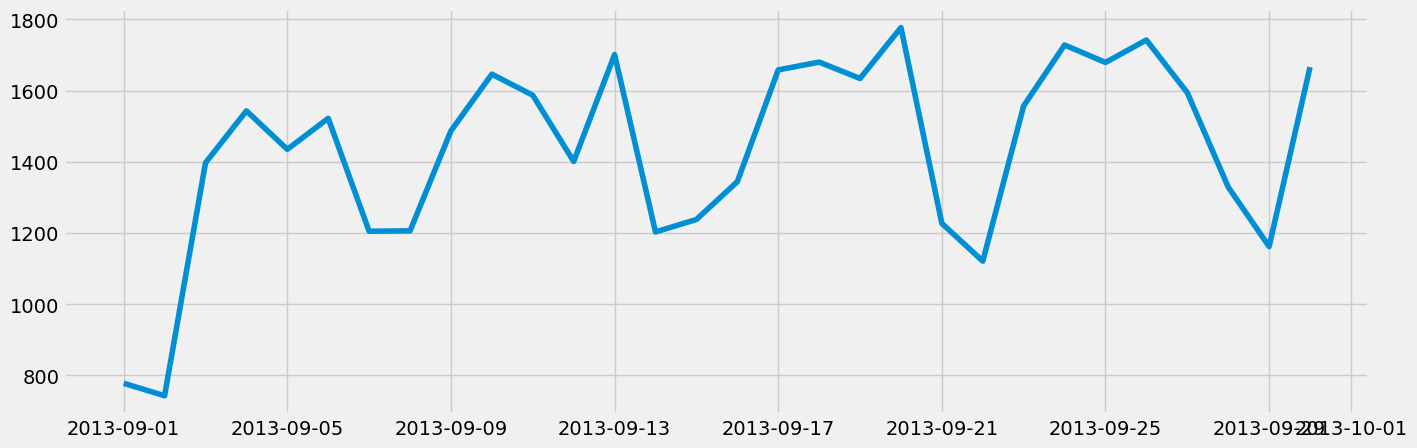

In [35]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

# 3. Time series analysis: decomposition

In [45]:
result

,ride_count
datetime,
2013-09-01,778
2013-09-02,743
2013-09-03,1397
2013-09-04,1543
2013-09-05,1435
2013-09-06,1522
2013-09-07,1205
2013-09-08,1206
2013-09-09,1487


In [47]:
# Reset index so that you can use the "Date" column as a filter

result_2 = result.reset_index()

In [48]:
result_2

,datetime,ride_count
0,2013-09-01,778
1,2013-09-02,743
2,2013-09-03,1397
3,2013-09-04,1543
4,2013-09-05,1435
5,2013-09-06,1522
6,2013-09-07,1205
7,2013-09-08,1206
8,2013-09-09,1487
9,2013-09-10,1646


In [55]:
result_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    30 non-null     datetime64[ns]
 1   ride_count  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 612.0 bytes


In [56]:
time_series = result_2['ride_count']

In [57]:
result_2['datetime'] = pd.to_datetime(result_2['datetime'])

In [58]:
result_2.set_index('datetime', inplace=True)

In [60]:
result_2.index.freq = 'D'

In [61]:
time_series = result_2['ride_count']

In [62]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')


In [63]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

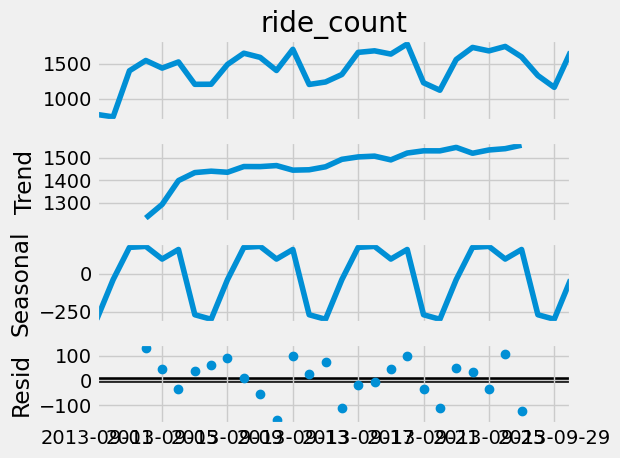

In [64]:
# Plot the separate components

decomposition.plot()
plt.show()

In [65]:
result_2

,ride_count
datetime,
2013-09-01,778
2013-09-02,743
2013-09-03,1397
2013-09-04,1543
2013-09-05,1435
2013-09-06,1522
2013-09-07,1205
2013-09-08,1206
2013-09-09,1487


## Level and Trend lines are different, so data needs to be smoothed. Trend line is increasing. Appears some seasonality  (day-night). Data is not stationary and need to be testing for Stationarity  and autocorrelation to be able to forecast.

# 4. Testing for stationarity

In [67]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_2['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.638719
p-value                         0.005063
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


### P-value is signifigant, less than 0.05. The test statistic is smaller at the 5 and 10 % value, then the null hypothesis can be regected. No necessary to differencing.


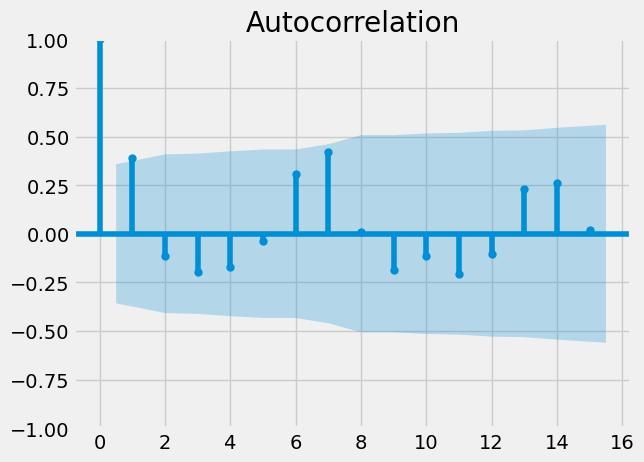

In [69]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_2)
plt.show()

In [70]:
# saving to csv
result_2.to_csv(os.path.join(path, '02 Data','prepared data', 'result_2.csv'))